<a href="https://colab.research.google.com/github/wtfoong/ODL_assignment/blob/main/ODL_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install new ver of panda profilling
!pip install pandas_profiling --upgrade

In [1]:
#imports
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import math
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Dataset Exploration and preprocessing

In [2]:
#Mounting Google Drive to google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
#connecting dataset
path = '/drive/MyDrive/ODL assignment/diabetes_binary_5050split_health_indicators_BRFSS2015.csv' 
df = pd.read_csv(path)

In [23]:
#read first 5 row of data
df.head()

Diabetes_binary  HighBP  HighChol   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0  26.0     0.0     0.0   
1              0.0     1.0       1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0  26.0     0.0     0.0   
3              0.0     1.0       1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  NoDocbcCost  \
0                   0.0           1.0                0.0          0.0   
1                   0.0           0.0                0.0          0.0   
2                   0.0           1.0                0.0          0.0   
3                   0.0           1.0                0.0          0.0   
4                   0.0           1.0                0.0          0.0   

   GenHlth  MentHlth  PhysHlth  DiffWalk   Age  Education  Income  
0      3.0       5.0      30.0       0.0   4.0        6.0     8.0  
1      3.0       0.0       0.0       0.0  12.0        6.0     8.0  
2      1.0       0.0      10.0       0.0  13.0        6.0     8.0  
3      3.0       0.0       3.0       0.0  11.0        6.0     8.0  
4      2.0       0.0       0.0       0.0   8.0        5.0     8.0

In [24]:
#read last 5 rows 
df.tail()

Diabetes_binary  HighBP  HighChol   BMI  Smoker  Stroke  \
70687              1.0     0.0       1.0  37.0     0.0     0.0   
70688              1.0     0.0       1.0  29.0     1.0     0.0   
70689              1.0     1.0       1.0  25.0     0.0     0.0   
70690              1.0     1.0       1.0  18.0     0.0     0.0   
70691              1.0     1.0       1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  NoDocbcCost  \
70687                   0.0           0.0                0.0          0.0   
70688                   1.0           0.0                0.0          0.0   
70689                   1.0           0.0                0.0          0.0   
70690                   0.0           0.0                0.0          0.0   
70691                   1.0           1.0                0.0          0.0   

       GenHlth  MentHlth  PhysHlth  DiffWalk   Age  Education  Income  
70687      4.0       0.0       0.0       0.0   6.0        4.0     1.0  
70688      2.0       0.0       0.0       1.0  10.0        3.0     6.0  
70689      5.0      15.0       0.0       1.0  13.0        6.0     4.0  
70690      4.0       0.0       0.0       1.0  11.0        2.0     4.0  
70691      2.0       0.0       0.0       0.0   9.0        6.0     2.0

In [25]:
#see all columns
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age',
       'Education', 'Income'],
      dtype='object')

In [26]:
#see dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   HvyAlcoholConsump     70692 non-null  float64
 9   NoDocbcCost           70692 non-null  float64
 10  GenHlth               70692 non-null  float64
 11  MentHlth              70692 non-null  float64
 12  PhysHlth              70692 non-null  float64
 13  DiffWalk              70692 non-null  float64
 14  Age                   70692 non-null  float64
 15  Education          

In [27]:
#know number of rows and columns
df.shape

(70692, 17)

In [28]:
#get mean and other stuff of all columns
df.describe()

Diabetes_binary        HighBP      HighChol           BMI  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703     29.856985   
std           0.500004      0.495960      0.499342      7.113954   
min           0.000000      0.000000      0.000000     12.000000   
25%           0.000000      0.000000      0.000000     25.000000   
50%           0.500000      1.000000      1.000000     29.000000   
75%           1.000000      1.000000      1.000000     33.000000   
max           1.000000      1.000000      1.000000     98.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  70692.000000  70692.000000          70692.000000  70692.000000   
mean       0.475273      0.062171              0.147810      0.703036   
std        0.499392      0.241468              0.354914      0.456924   
min        0.000000      0.000000              0.000000      0.000000   
25%        0.000000      0.000000              0.000000      0.000000   
50%        0.000000      0.000000              0.000000      1.000000   
75%        1.000000      0.000000              0.000000      1.000000   
max        1.000000      1.000000              1.000000      1.000000   

       HvyAlcoholConsump   NoDocbcCost       GenHlth      MentHlth  \
count       70692.000000  70692.000000  70692.000000  70692.000000   
mean            0.042721      0.093914      2.837082      3.752037   
std             0.202228      0.291712      1.113565      8.155627   
min             0.000000      0.000000      1.000000      0.000000   
25%             0.000000      0.000000      2.000000      0.000000   
50%             0.000000      0.000000      3.000000      0.000000   
75%             0.000000      0.000000      4.000000      2.000000   
max             1.000000      1.000000      5.000000     30.000000   

           PhysHlth      DiffWalk           Age     Education        Income  
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000  
mean       5.810417      0.252730      8.584055      4.920953      5.698311  
std       10.062261      0.434581      2.852153      1.029081      2.175196  
min        0.000000      0.000000      1.000000      1.000000      1.000000  
25%        0.000000      0.000000      7.000000      4.000000      4.000000  
50%        0.000000      0.000000      9.000000      5.000000      6.000000  
75%        6.000000      1.000000     11.000000      6.000000      8.000000  
max       30.000000      1.000000     13.000000      6.000000      8.000000

In [6]:
#get a detailed report for all columsn in the dataset
pReport = ProfileReport(df)
pReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
#check for missing data
df.isnull().sum().any()

False

In [9]:
# view unique values in all columns
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()


unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   80
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

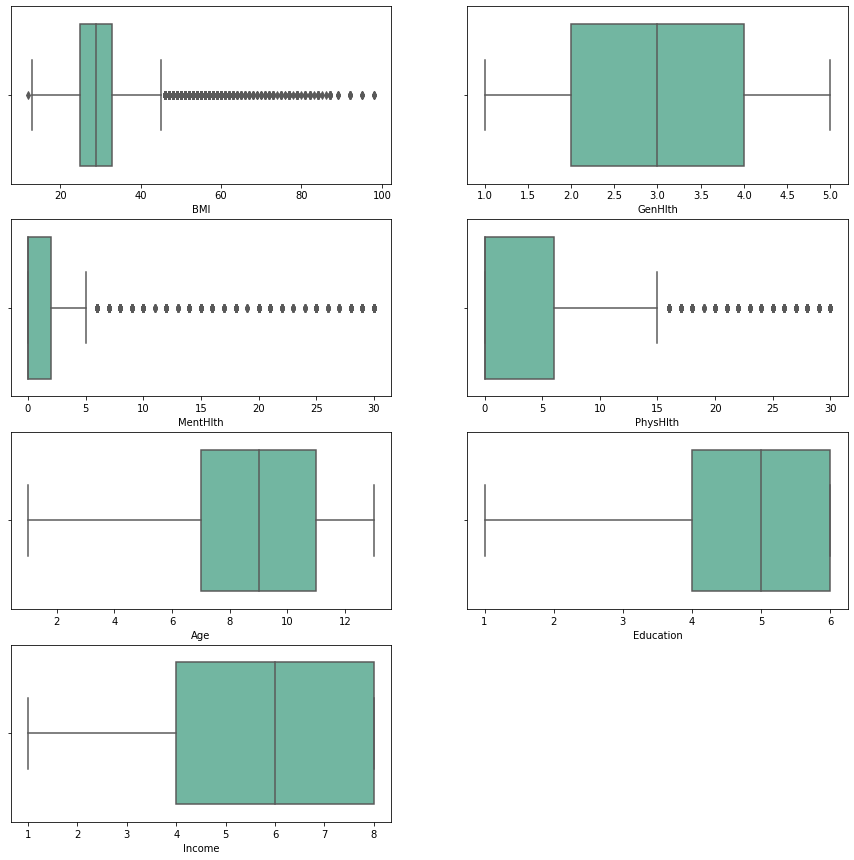

In [10]:
# chk for outliers in dataset using box plot, columns chosen to check are columns with more than 2 unique values
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df ,palette='Set2')
plt.show()

In [4]:
#Replacing 0 into Non-Diabetic and 1 into Diabetic in a new Diabetes_str column
df["Diabetes_str"]= df["Diabetes_binary"].replace({'0':"Not Diabetic",'1':"Diabetic"})

In [5]:
# to show categorical values better
df2 = df.copy() 

In [ ]:
# help to show relations between the different features better, all explaination for columns are from author of dataset
df2.Age[df2['Age'] == 1] = '18 - 24'
df2.Age[df2['Age'] == 2] = '25 - 29'
df2.Age[df2['Age'] == 3] = '30 - 34'
df2.Age[df2['Age'] == 4] = '35 - 39'
df2.Age[df2['Age'] == 5] = '40 - 44'
df2.Age[df2['Age'] == 6] = '45 - 49'
df2.Age[df2['Age'] == 7] = '50 - 54'
df2.Age[df2['Age'] == 8] = '55 - 59'
df2.Age[df2['Age'] == 9] = '60 - 64'
df2.Age[df2['Age'] == 10] = '65 - 69'
df2.Age[df2['Age'] == 11] = '70 - 74'
df2.Age[df2['Age'] == 12] = '75 - 79'
df2.Age[df2['Age'] == 13] = '80 or older'

df2.Diabetes_binary[df2['Diabetes_binary'] == 0] = 'Not Diabetic'
df2.Diabetes_binary[df2['Diabetes_binary'] == 1] = 'Diabetic'

df2.HighBP[df2['HighBP'] == 0] = 'Normal BP'
df2.HighBP[df2['HighBP'] == 1] = 'High BP'

df2.HighChol[df2['HighChol'] == 0] = 'Normal Cholesterol'
df2.HighChol[df2['HighChol'] == 1] = 'High Cholesterol'

df2.CholCheck[df2['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df2.CholCheck[df2['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df2.Smoker[df2['Smoker'] == 0] = 'No'
df2.Smoker[df2['Smoker'] == 1] = 'Yes'

df2.Stroke[df2['Stroke'] == 0] = 'No'
df2.Stroke[df2['Stroke'] == 1] = 'Yes'

df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 0] = 'No'
df2.HeartDiseaseorAttack[df2['HeartDiseaseorAttack'] == 1] = 'Yes'

df2.PhysActivity[df2['PhysActivity'] == 0] = 'No'
df2.PhysActivity[df2['PhysActivity'] == 1] = 'Yes'

df2.Fruits[df2['Fruits'] == 0] = 'No'
df2.Fruits[df2['Fruits'] == 1] = 'Yes'

df2.Veggies[df2['Veggies'] == 0] = 'No'
df2.Veggies[df2['Veggies'] == 1] = 'Yes'

df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 0] = 'No'
df2.HvyAlcoholConsump[df2['HvyAlcoholConsump'] == 1] = 'Yes'

df2.AnyHealthcare[df2['AnyHealthcare'] == 0] = 'No'
df2.AnyHealthcare[df2['AnyHealthcare'] == 1] = 'Yes'

df2.NoDocbcCost[df2['NoDocbcCost'] == 0] = 'No'
df2.NoDocbcCost[df2['NoDocbcCost'] == 1] = 'Yes'

df2.GenHlth[df2['GenHlth'] == 5] = 'Excellent'
df2.GenHlth[df2['GenHlth'] == 4] = 'Very Good'
df2.GenHlth[df2['GenHlth'] == 3] = 'Good'
df2.GenHlth[df2['GenHlth'] == 2] = 'Fair'
df2.GenHlth[df2['GenHlth'] == 1] = 'Poor'

df2.DiffWalk[df2['DiffWalk'] == 0] = 'No'
df2.DiffWalk[df2['DiffWalk'] == 1] = 'Yes'

df2.Sex[df2['Sex'] == 0] = 'Female'
df2.Sex[df2['Sex'] == 1] = 'Male'

df2.Education[df2['Education'] == 1] = 'Never Attended School'
df2.Education[df2['Education'] == 2] = 'Elementary'
df2.Education[df2['Education'] == 3] = 'Junior High School'
df2.Education[df2['Education'] == 4] = 'Senior High School'
df2.Education[df2['Education'] == 5] = 'Undergraduate Degree'
df2.Education[df2['Education'] == 6] = 'Magister'

df2.Income[df2['Income'] == 1] = 'Less Than $10,000'
df2.Income[df2['Income'] == 2] = 'Less Than $10,000'
df2.Income[df2['Income'] == 3] = 'Less Than $10,000'
df2.Income[df2['Income'] == 4] = 'Less Than $10,000'
df2.Income[df2['Income'] == 5] = 'Less Than $35,000'
df2.Income[df2['Income'] == 6] = 'Less Than $35,000'
df2.Income[df2['Income'] == 7] = 'Less Than $35,000'
df2.Income[df2['Income'] == 8] = '$75,000 or More'

Text(0.5, 1.0, 'correlation of features')

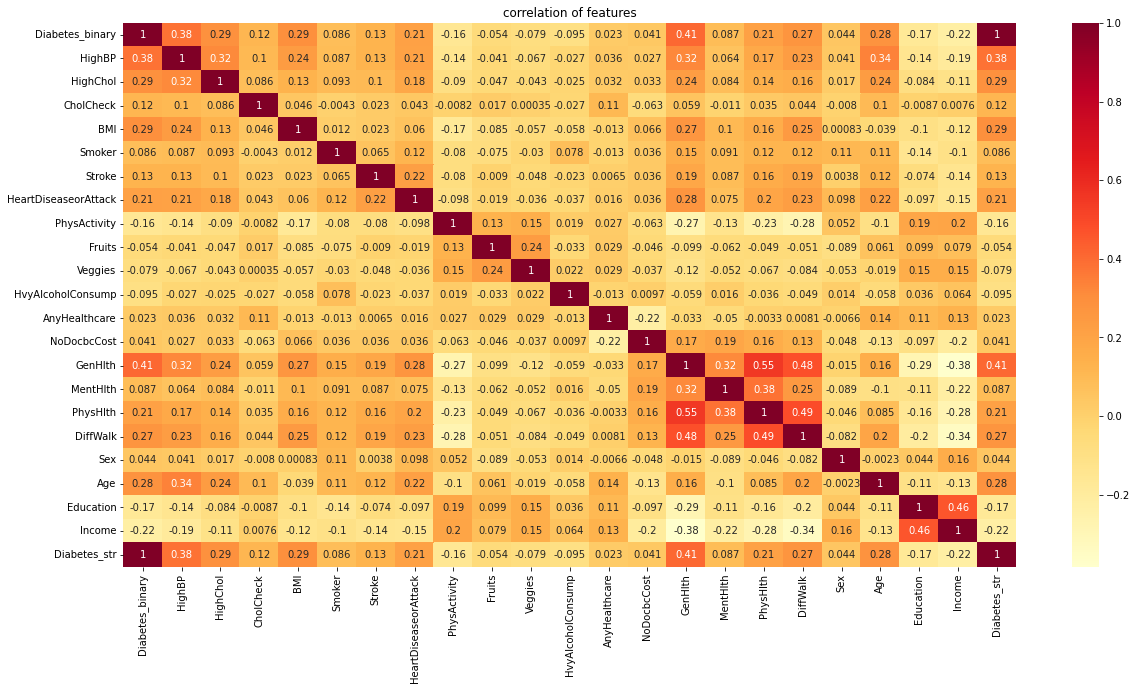

In [14]:
#use heatmap to show correlation of features in the dataset
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of features")

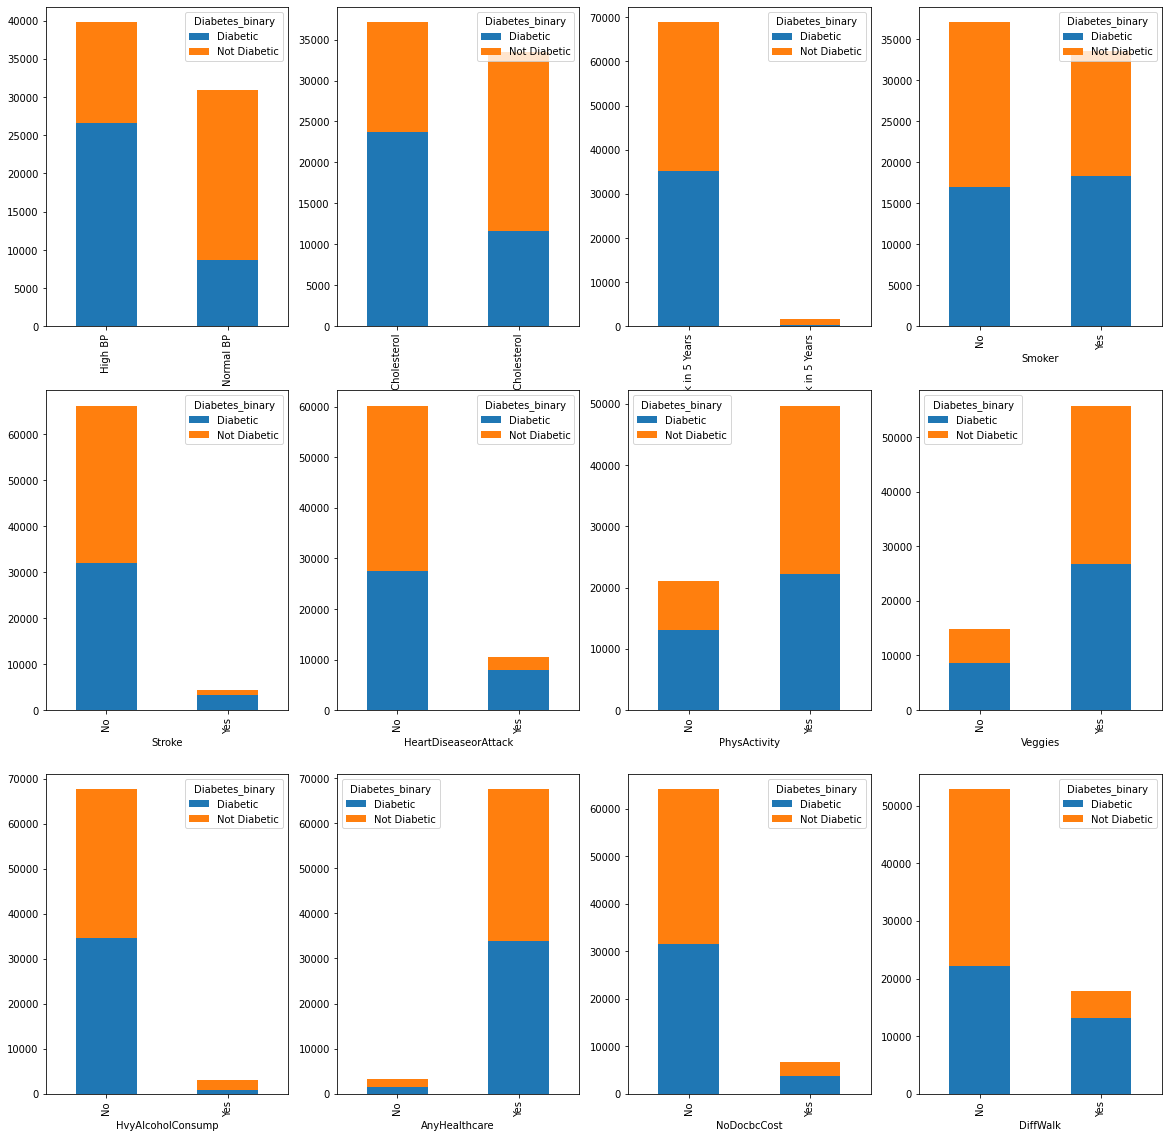

In [15]:
# using bar graph to show the relation of the features with the Diabetic binary along with the feature's yes no columns
cols = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

def create_pivot_plot(df2, x_column):
    # Create a pivot table for satisfaction versus another rating for easy plotting.
    p_plot = df2.groupby([x_column, 'Diabetes_binary']).size() \
    .reset_index().pivot(columns='Diabetes_binary', index=x_column, values=0)
    return p_plot

fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_pivot_plot(df2, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()



---



In [16]:
#explore on Diabetes_binary column

df2["Diabetes_binary"].value_counts()

Not Diabetic    35346
Diabetic        35346
Name: Diabetes_binary, dtype: int64

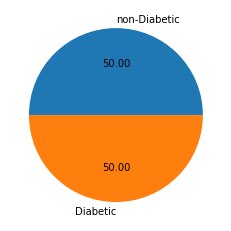

In [17]:
#showing the numbers in a pie chart

labels=["non-Diabetic","Diabetic"]

plt.pie(df2["Diabetes_binary"].value_counts() , labels =labels ,autopct='%.02f' );

The pie chart shows that the data is balanced as the dataset is an already balanced dataset.



---



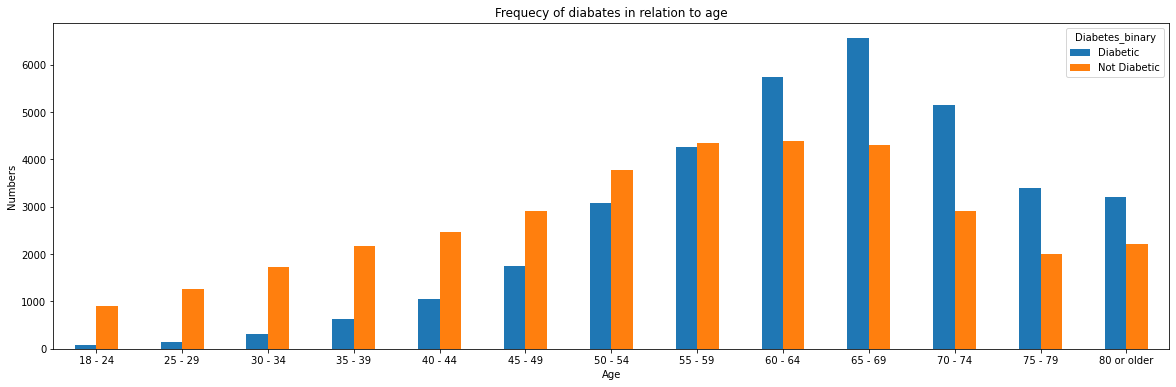

In [18]:
#Age relation with diabetes binary
pd.crosstab(df2.Age,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

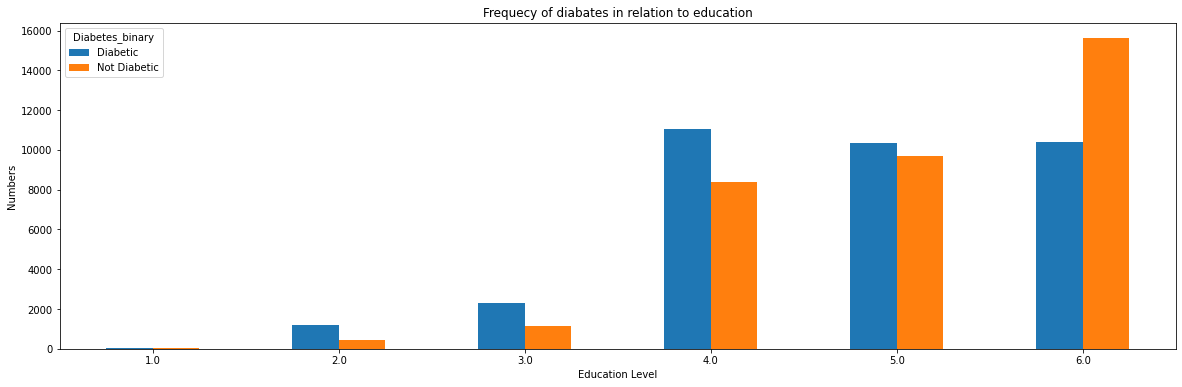

In [19]:
#relation of education with diabetes
pd.crosstab(df.Education,df2.Diabetes_binary).plot(kind="bar",figsize=(20,6))
plt.title('Frequecy of diabates in relation to education')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()

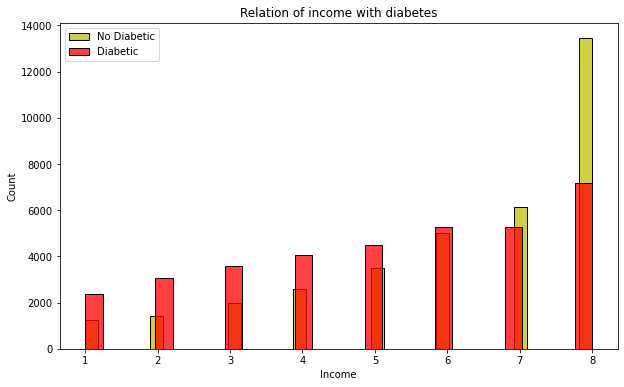

In [20]:
#relation of income with diabetes
plt.figure(figsize=(10,6))


sns.histplot(df.Income[df.Diabetes_binary == 0], color="y", label="No Diabetic" )
sns.histplot(df.Income[df.Diabetes_binary == 1], color="r", label="Diabetic" )
plt.title("Relation of income with diabetes")

plt.legend()

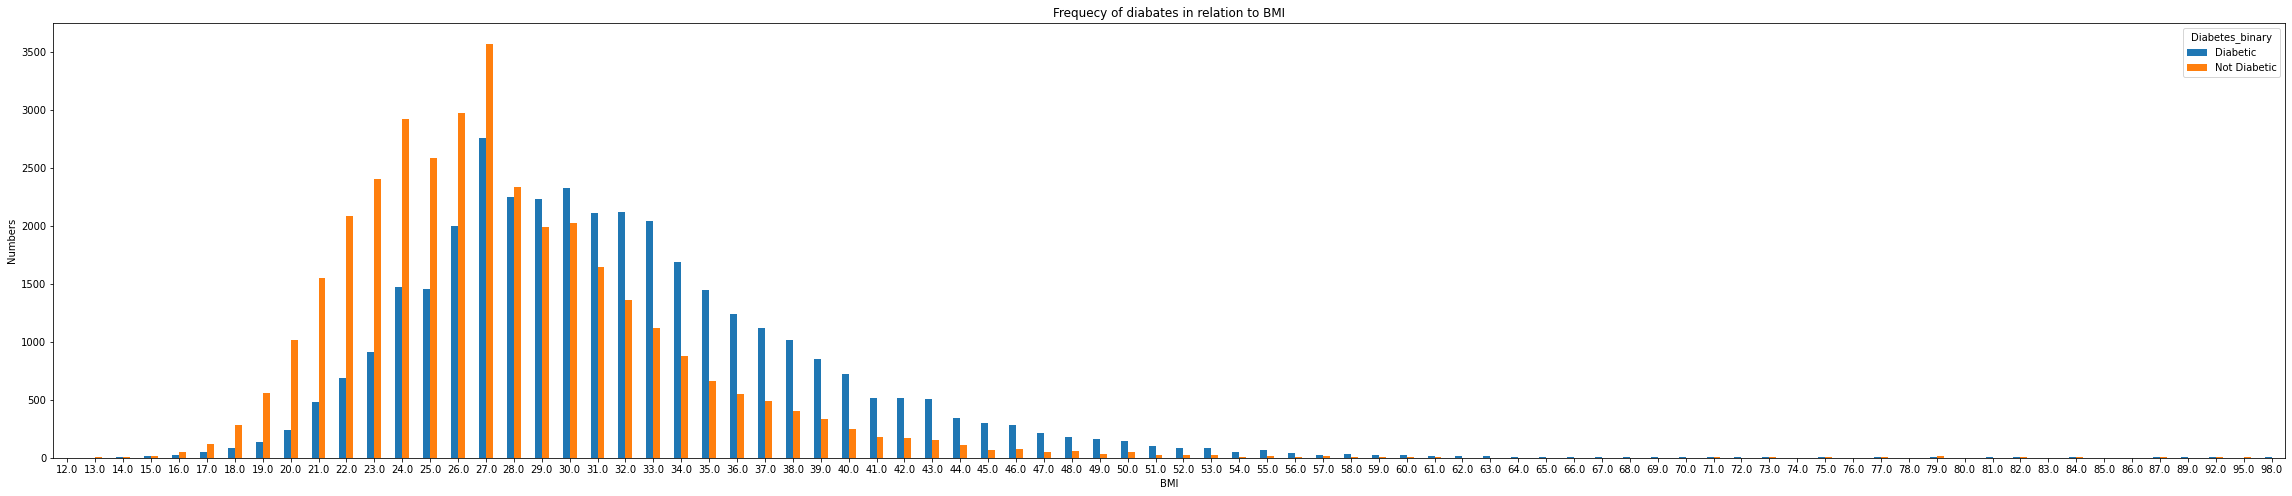

In [21]:
#see the relation of  BMI and diabetes
pd.crosstab(df2.BMI,df2.Diabetes_binary).plot(kind="bar",figsize=(40,8))
plt.title('Frequecy of diabates in relation to BMI')
plt.xlabel('BMI')
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.show()



---



### Feature Selection

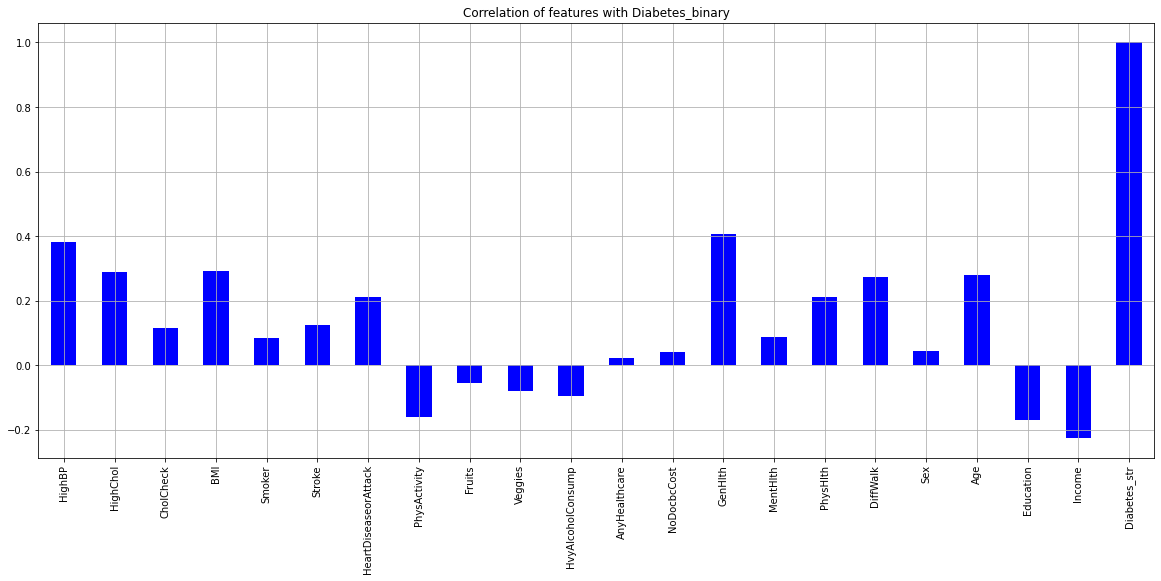

In [22]:
# use bar graph to see the correlation of the features to diabete binary
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation of features with Diabetes_binary",color="Blue");

In [23]:
#use chi square to select best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,1:]
Y = df.iloc[:,0]

feature_comparison = SelectKBest(score_func=chi2, k=10)
f = feature_comparison.fit(X,Y)

feature_scores = pd.DataFrame(f.scores_)
features = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores_table = pd.concat([features,feature_scores],axis=1)              
f_Scores_table.columns = ['Feature','Score']

f_Scores_table.sort_values(by=['Score'],ascending=False)

Feature         Score
15              PhysHlth  55929.053254
21          Diabetes_str  35346.000000
3                    BMI  10312.875795
14              MentHlth   9491.555258
18                   Age   5204.869946
13               GenHlth   5133.529630
0                 HighBP   4491.799960
16              DiffWalk   3926.865331
20                Income   2956.984221
1               HighChol   2804.501278
6   HeartDiseaseorAttack   2695.401378
5                 Stroke   1042.976337
10     HvyAlcoholConsump    608.852980
7           PhysActivity    528.494034
19             Education    442.144248
4                 Smoker    274.340616
12           NoDocbcCost    107.550083
9                Veggies     93.883501
8                 Fruits     80.250850
17                   Sex     75.716461
2              CholCheck     23.284293
11         AnyHealthcare      1.712390

Features with score lower than 100 will be removed. In this case, veggies, fruits, sex, cholcheck and anyhealth care will be removed as features.

In [6]:
disqualified_features = ["Veggies" , "Fruits" , "Sex" , "CholCheck" , "AnyHealthcare" , "Diabetes_str"]

In [7]:
df.drop(disqualified_features,axis= 1 ,inplace=True)



---



### Logistic Regression

# base model

In [8]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
#seprating to DV and IV
X=df.iloc[:,1:]
Y= df['Diabetes_binary']

In [10]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53019, 16)
(17673, 16)
(53019,)
(17673,)


In [11]:
model = LogisticRegression(C=1,solver = 'liblinear', random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=1, random_state=0, solver='liblinear')

In [12]:
#the attribute .classes_ represents the array of distinct values that y takes
model.classes_

array([0., 1.])

In [31]:
#evaluate the model
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  [-5.56507223]
Slope:  [[ 0.74280352  0.59954326  0.07748636  0.00853575  0.13356614  0.2864562
  -0.03966265 -0.73274953 -0.02838036  0.59317242 -0.00522738 -0.00904789
   0.09608676  0.15383739 -0.04476154 -0.04250599]]


In [32]:
model.predict(X_test)

array([1., 0., 0., ..., 1., 0., 1.])

In [13]:
model.score(X_test,y_test)

0.745713800712952

In [14]:
confusion_matrix(y_test,model.predict(X_test))

array([[6291, 2398],
       [2096, 6888]])

In [35]:
#comprehensive report on the classification 
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8689
         1.0       0.74      0.77      0.75      8984

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



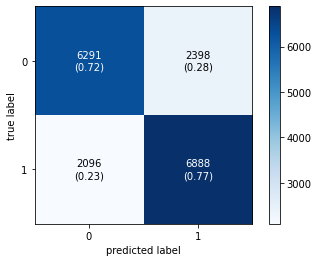

In [15]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(y_test,model.predict(X_test))
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Base model with SGD classifier

In [33]:
from sklearn.linear_model import SGDClassifier
sgd_base = SGDClassifier(loss = 'log', max_iter = 1000, alpha = 0.0001)
#n_iter = max_iter, alpha = tol
sgd_base.fit(X_train,y_train)
Y_pred = sgd_base.predict(X_test)

print("Coefficients: \n",sgd_base.coef_)
print("Y_intercept: \n",sgd_base.intercept_)
print("Score: \n",sgd_base.score(X_test,y_test))

Coefficients: 
 [[ 0.85845805  0.71171482  0.11721183  0.02563527  0.16553926  0.3492436
  -0.04481268 -0.86102661 -0.03513036  0.70676389  0.02008683 -0.00997002
   0.14159138  0.17071064 -0.05171841 -0.11810992]]
Y_intercept: 
 [-6.922357]
Score: 
 0.7442992134895038


In [37]:
#comprehensive report on the classification 
print(classification_report(y_test,sgd_base.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8689
         1.0       0.74      0.77      0.75      8984

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



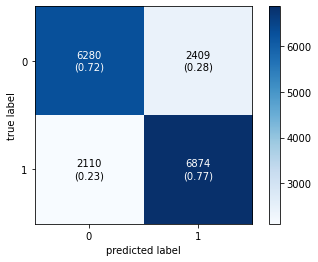

In [38]:
#confusion matrix
cm2 = confusion_matrix(y_test,sgd_base.predict(X_test))
plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Perform the GridSearch (hyper parameter tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver':('lbfgs','liblinear','saga','sag','newton-cg'),'penalty':('l2','l1','elasticnet'),
              'C':[0.1,0.5,1,2,3,5],
              'max_iter':[100,1000,5000,10000,20000]}
model5 = LogisticRegression(random_state = 0)
clf3=GridSearchCV(model5 , parameters)
clf3.fit(X_train,y_train)

In [59]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf3.cv_results_['params'])
mean_test_score = pd.DataFrame(clf3.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['C','max_iter','penalty','solver','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

C  max_iter     penalty     solver  mean test score
49   0.1     10000          l2  newton-cg         0.745469
19   0.1      1000          l2  newton-cg         0.745469
4    0.1       100          l2  newton-cg         0.745469
64   0.1     20000          l2  newton-cg         0.745469
34   0.1      5000          l2  newton-cg         0.745469
..   ...       ...         ...        ...              ...
445  5.0     20000  elasticnet      lbfgs              NaN
446  5.0     20000  elasticnet  liblinear              NaN
447  5.0     20000  elasticnet       saga              NaN
448  5.0     20000  elasticnet        sag              NaN
449  5.0     20000  elasticnet  newton-cg              NaN

[450 rows x 5 columns]

In [60]:
clf3.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
clf3.best_score_

0.7454686479236409

In [62]:
clf3.best_estimator_.intercept_

array([-5.62478513])

In [66]:
clf3.best_estimator_.coef_

array([[ 0.73886013,  0.59804903,  0.07816526,  0.00970696,  0.1322197 ,
         0.28365854, -0.03677756, -0.71360464, -0.02522411,  0.59569439,
        -0.00517107, -0.0090523 ,  0.09467756,  0.15544786, -0.04170066,
        -0.04205562]])

In [64]:
#comprehensive report on the classification 
print(classification_report(y_test,clf3.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      8689
         1.0       0.74      0.77      0.75      8984

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



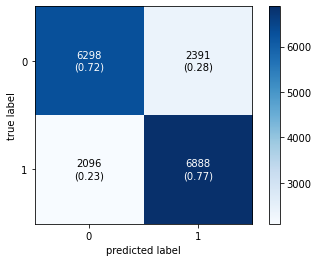

In [67]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm3 = confusion_matrix(y_test,clf3.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

Performing GridsearchCV for SCGClassifier

In [41]:

parameters = {'loss':('hinge','log','modified_huber'),'penalty':('l2','l1','elasticnet'),
              'alpha':[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],
              'max_iter':[1000,5000,10000,20000],}
model3 = SGDClassifier(random_state = 0)
clf=GridSearchCV(model3 , parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SGDClassifier(random_state=0),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'loss': ('hinge', 'log', 'modified_huber'),
                         'max_iter': [1000, 5000, 10000, 20000],
                         'penalty': ('l2', 'l1', 'elasticnet')})

In [43]:
#show all results of the combination of parameter and scores

combinations = pd.DataFrame(clf.cv_results_['params'])
mean_test_score = pd.DataFrame(clf.cv_results_['mean_test_score'])

#concatenating two dataframes for better visualization
combination_table = pd.concat([combinations,mean_test_score],axis=1)              
combination_table.columns = ['alpha','loss','max_iter','penalty','mean test score']
#print(combination_table)
combination_table.sort_values(by=['mean test score'],ascending=False)

alpha            loss  max_iter     penalty  mean test score
124  0.00100             log      5000          l1         0.741546
130  0.00100             log     20000          l1         0.741546
127  0.00100             log     10000          l1         0.741546
121  0.00100             log      1000          l1         0.741546
155  0.01000           hinge     20000  elasticnet         0.739377
..       ...             ...       ...         ...              ...
106  0.00010  modified_huber     20000          l1         0.603352
59   0.00001             log     20000  elasticnet         0.589261
50   0.00001             log      1000  elasticnet         0.589261
53   0.00001             log      5000  elasticnet         0.589261
56   0.00001             log     10000  elasticnet         0.589261

[216 rows x 5 columns]

In [55]:
clf.best_params_

{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}

In [56]:
clf.best_score_

0.7415455982383725

In [46]:
clf.best_estimator_.intercept_

array([-8.63857408])

In [47]:
clf.best_estimator_.coef_

array([[ 0.72094873,  0.62408164,  0.12319819,  0.05892259,  0.05487326,
         0.20588853,  0.0500531 , -0.57226247,  0.        ,  0.77374213,
         0.        , -0.01783413,  0.        ,  0.21192951,  0.05744494,
         0.        ]])

In [48]:
#comprehensive report on the classification 
print(classification_report(y_test,clf.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73      8689
         1.0       0.73      0.78      0.75      8984

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



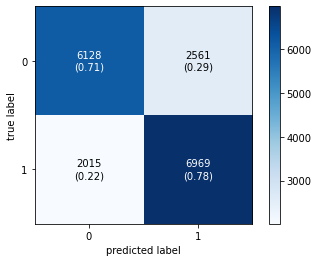

In [57]:
#confusion matrix
from mlxtend.plotting import plot_confusion_matrix
cm4 = confusion_matrix(y_test,clf.best_estimator_.predict(X_test))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [76]:
model = LogisticRegression(C=0.1,max_iter= 100, penalty= 'l2', solver= 'newton-cg')
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.7461098851355175